# Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регрессии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие модели:
одну из линейных моделей (линейную или полиномиальную регрессию при решении задачи регрессии, логистическую регрессию при решении задачи классификации);
SVM;
дерево решений.
5. Оцените качество моделей с помощью двух подходящих для задачи метрик. Сравните качество полученных моделей.
6. Постройте график, показывающий важность признаков в дереве решений.
7. Визуализируйте дерево решений или выведите правила дерева решений в текстовом виде.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style="ticks")
from sklearn.svm import SVC, NuSVC, LinearSVC, OneClassSVM, SVR, NuSVR, LinearSVR

In [2]:
# Будем анализировать данные только на обучающей выборке
df = pd.read_csv('/Users/evgeniayurova/Desktop/ML/House Price India.csv')

In [3]:
df

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

id   Date  number of bedrooms  number of bathrooms  \
0      6762810145  42491                   5                 2.50   
1      6762810635  42491                   4                 2.50   
2      6762810998  42491                   5                 2.75   
3      6762812605  42491                   4                 2.50   
4      6762812919  42491                   3                 2.00   
...           ...    ...                 ...                  ...   
14615  6762830250  42734                   2                 1.50   
14616  6762830339  42734                   3                 2.00   
14617  6762830618  42734                   2                 1.00   
14618  6762830709  42734                   4                 1.00   
14619  6762831463  42734                   3                 1.00   

       living area  lot area  number of floors  waterfront present  \
0             3650      9050               2.0                   0   
1             2920      4000               1.5                   0   
2             2910      9480               1.5                   0   
3             3310     42998               2.0                   0   
4             2710      4500               1.5                   0   
...            ...       ...               ...                 ...   
14615         1556     20000               1.0                   0   
14616         1680      7000               1.5                   0   
14617         1070      6120               1.0                   0   
14618         1030      6621               1.0                   0   
14619          900      4770               1.0                   0   

       number of views  condition of the house  ...  Built Year  \
0                    4                       5  ...        1921   
1                    0                       5  ...        1909   
2                    0                       3  ...        1939   
3                    0                       3  ...        2001   
4                    0                       4  ...        1929   
...                ...                     ...  ...         ...   
14615                0                       4  ...        1957   
14616                0                       4  ...        1968   
14617                0                       3  ...        1962   
14618                0                       4  ...        1955   
14619                0                       3  ...        1969   

       Renovation Year  Postal Code  Lattitude  Longitude  living_area_renov  \
0                    0       122003    52.8645   -114.557               2880   
1                    0       122004    52.8878   -114.470               2470   
2                    0       122004    52.8852   -114.468               2940   
3                    0       122005    52.9532   -114.321               3350   
4                    0       122006    52.9047   -114.485               2060   
...                ...          ...        ...        ...                ...   
14615                0       122066    52.6191   -114.472               2250   
14616                0       122072    52.5075   -114.393               1540   
14617                0       122056    52.7289   -114.507               1130   
14618                0       122042    52.7157   -114.411               1420   
14619             2009       122018    52.5338   -114.552                900   

       lot_area_renov  Number of schools nearby  Distance from the airport  \
0                5400                         2                         58   
1                4000                         2                         51   
2                6600                         1                         53   
3               42847                         3                         76   
4                4500                         1                         51   
...               ...                       ...                        ...   
14615           17286            

In [4]:
def draw_missing(df):
    total = df.isnull().sum().sort_values(ascending=False)
    percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)*100
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data

In [5]:
draw_missing(df).round(1)

Total  Percent
id                                         0      0.0
Area of the basement                       0      0.0
Distance from the airport                  0      0.0
Number of schools nearby                   0      0.0
lot_area_renov                             0      0.0
living_area_renov                          0      0.0
Longitude                                  0      0.0
Lattitude                                  0      0.0
Postal Code                                0      0.0
Renovation Year                            0      0.0
Built Year                                 0      0.0
Area of the house(excluding basement)      0      0.0
Date                                       0      0.0
grade of the house                         0      0.0
condition of the house                     0      0.0
number of views                            0      0.0
waterfront present                         0      0.0
number of floors                           0      0.0
lot area                                   0      0.0
living area                                0      0.0
number of bathrooms                        0      0.0
number of bedrooms                         0      0.0
Price                                      0      0.0

Total  Percent
id                                         0      0.0
Area of the basement                       0      0.0
Distance from the airport                  0      0.0
Number of schools nearby                   0      0.0
lot_area_renov                             0      0.0
living_area_renov                          0      0.0
Longitude                                  0      0.0
Lattitude                                  0      0.0
Postal Code                                0      0.0
Renovation Year                            0      0.0
Built Year                                 0      0.0
Area of the house(excluding basement)      0      0.0
Date                                       0      0.0
grade of the house                         0      0.0
condition of the house                     0      0.0
number of views                            0      0.0
waterfront present                         0      0.0
number of floors                           0      0.0
lot area                                   0      0.0
living area                                0      0.0
number of bathrooms                        0      0.0
number of bedrooms                         0      0.0
Price                                      0      0.0

Total  Percent
id                                         0      0.0
Area of the basement                       0      0.0
Distance from the airport                  0      0.0
Number of schools nearby                   0      0.0
lot_area_renov                             0      0.0
living_area_renov                          0      0.0
Longitude                                  0      0.0
Lattitude                                  0      0.0
Postal Code                                0      0.0
Renovation Year                            0      0.0
Built Year                                 0      0.0
Area of the house(excluding basement)      0      0.0
Date                                       0      0.0
grade of the house                         0      0.0
condition of the house                     0      0.0
number of views                            0      0.0
waterfront present                         0      0.0
number of floors                           0      0.0
lot area                                   0      0.0
living area                                0      0.0
number of bathrooms                        0      0.0
number of bedrooms                         0      0.0
Price                                      0      0.0

Total  Percent
id                                         0      0.0
Area of the basement                       0      0.0
Distance from the airport                  0      0.0
Number of schools nearby                   0      0.0
lot_area_renov                             0      0.0
living_area_renov                          0      0.0
Longitude                                  0      0.0
Lattitude                                  0      0.0
Postal Code                                0      0.0
Renovation Year                            0      0.0
Built Year                                 0      0.0
Area of the house(excluding basement)      0      0.0
Date                                       0      0.0
grade of the house                         0      0.0
condition of the house                     0      0.0
number of views                            0      0.0
waterfront present                         0      0.0
number of floors                           0      0.0
lot area                                   0      0.0
living area                                0      0.0
number of bathrooms                        0      0.0
number of bedrooms                         0      0.0
Price                                      0      0.0

In [6]:
df.shape

(14620, 23)

(14620, 23)

(14620, 23)

(14620, 23)

In [7]:
df.dtypes

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

id                                         int64
Date                                       int64
number of bedrooms                         int64
number of bathrooms                      float64
living area                                int64
lot area                                   int64
number of floors                         float64
waterfront present                         int64
number of views                            int64
condition of the house                     int64
grade of the house                         int64
Area of the house(excluding basement)      int64
Area of the basement                       int64
Built Year                                 int64
Renovation Year                            int64
Postal Code                                int64
Lattitude                                float64
Longitude                                float64
living_area_renov                          int64
lot_area_renov                             int64
Number of schools ne

## Разделение на обучающую и тестовую выборку

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X = df.drop("living area", axis=1)
Y = df["living area"]

In [10]:
print(X.head(), "\n")
print(Y.head())

           id   Date  number of bedrooms  number of bathrooms  lot area  \
0  6762810145  42491                   5                 2.50      9050   
1  6762810635  42491                   4                 2.50      4000   
2  6762810998  42491                   5                 2.75      9480   
3  6762812605  42491                   4                 2.50     42998   
4  6762812919  42491                   3                 2.00      4500   

   number of floors  waterfront present  number of views  \
0               2.0                   0                4   
1               1.5                   0                0   
2               1.5                   0                0   
3               2.0                   0                0   
4               1.5                   0                0   

   condition of the house  grade of the house  ...  Built Year  \
0                       5                  10  ...        1921   
1                       5                   8  ...      

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,test_size=0.25, random_state=1)

In [12]:
X_train.shape, y_train.shape

((10965, 22), (10965,))

((10965, 22), (10965,))

((10965, 22), (10965,))

((10965, 22), (10965,))

In [13]:
X_test.shape, y_test.shape

((3655, 22), (3655,))

((3655, 22), (3655,))

((3655, 22), (3655,))

((3655, 22), (3655,))

## Обучение моделей

### Линейная модель регрессии

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

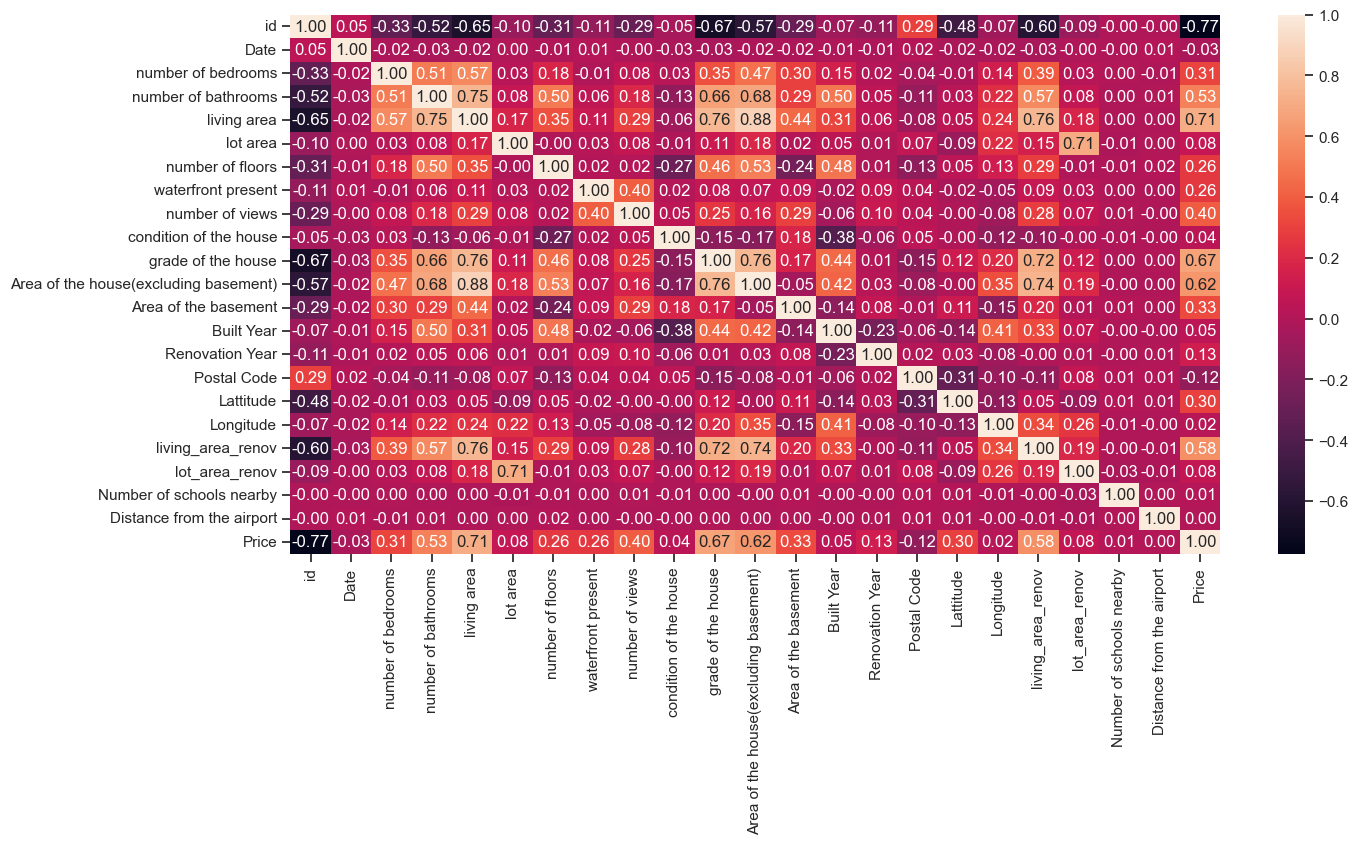

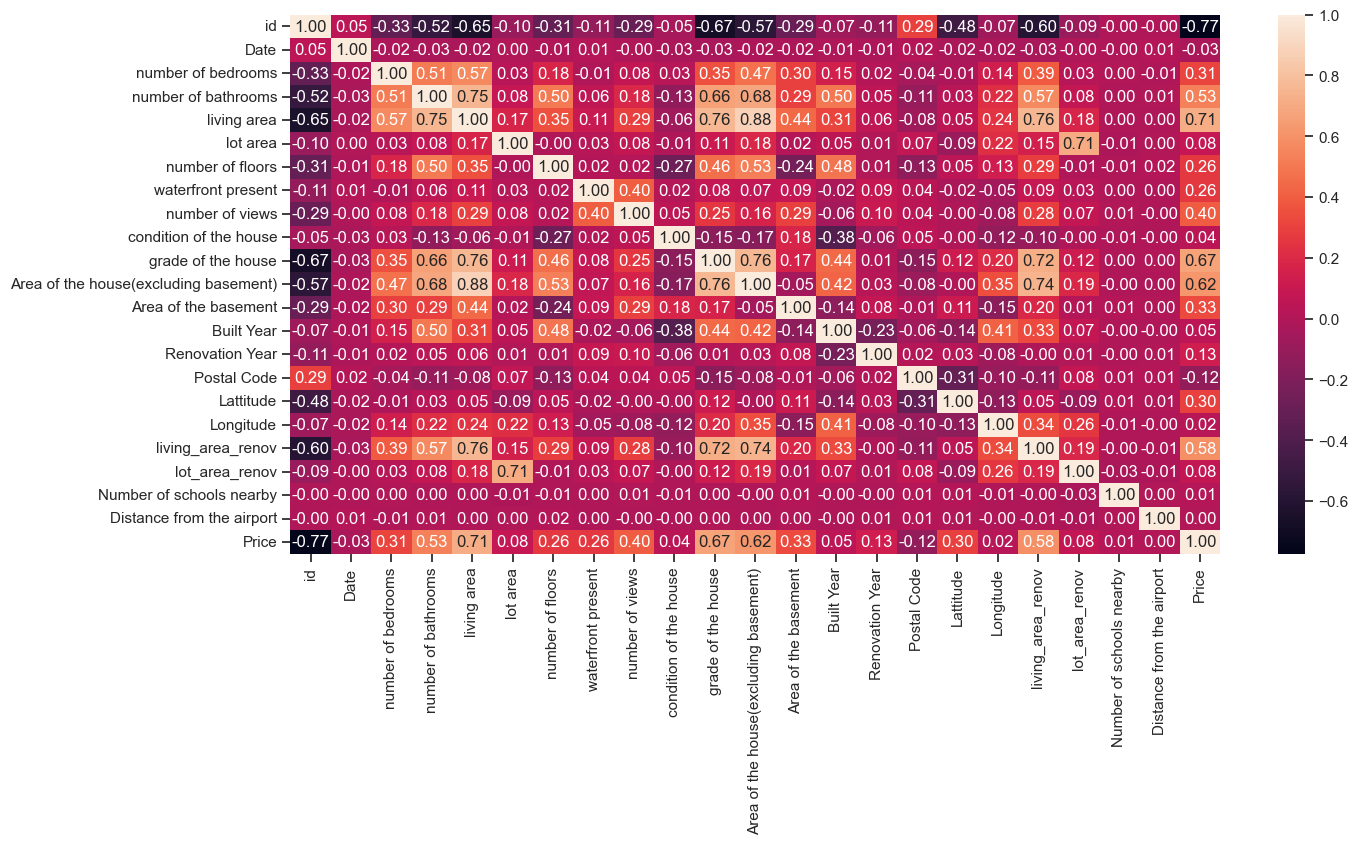

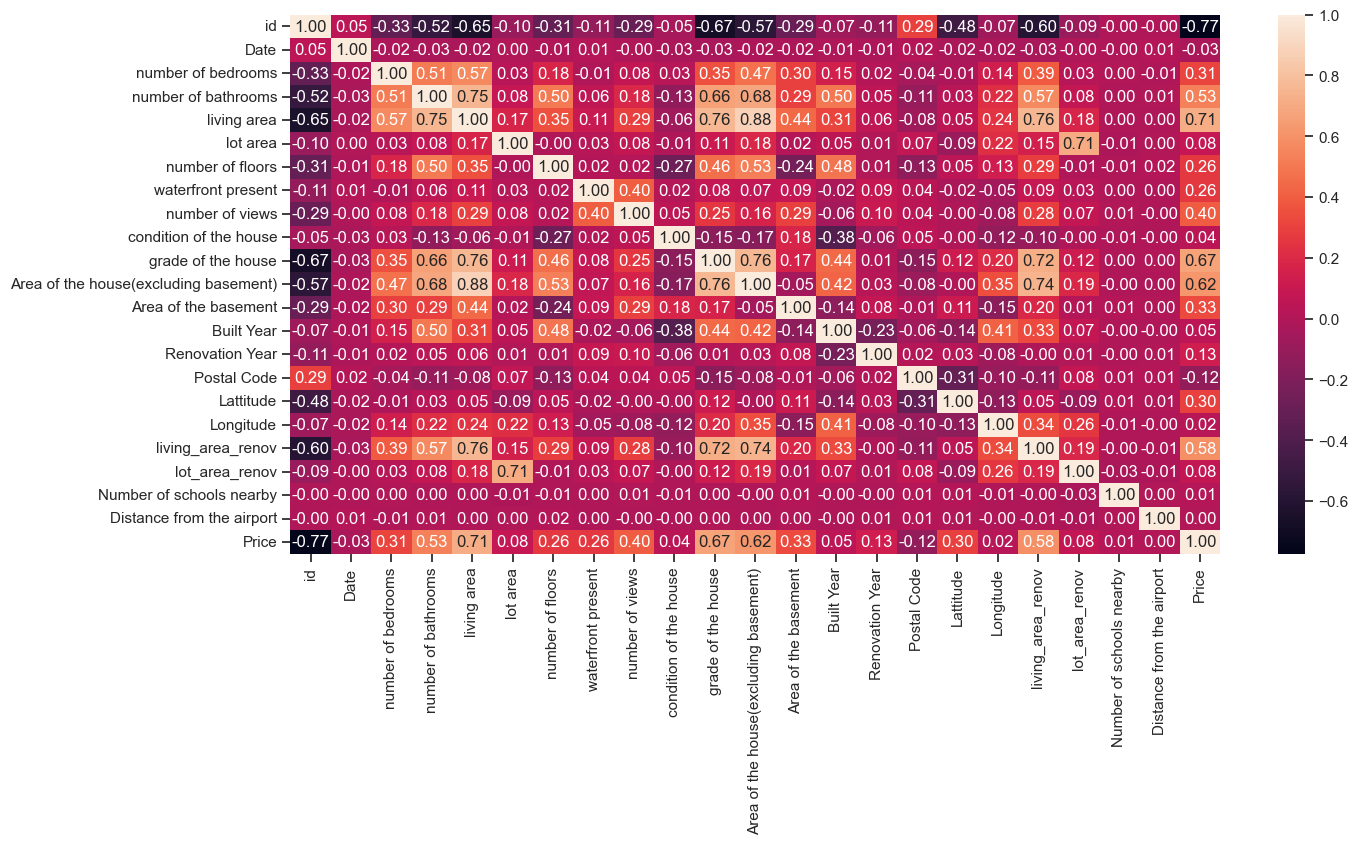

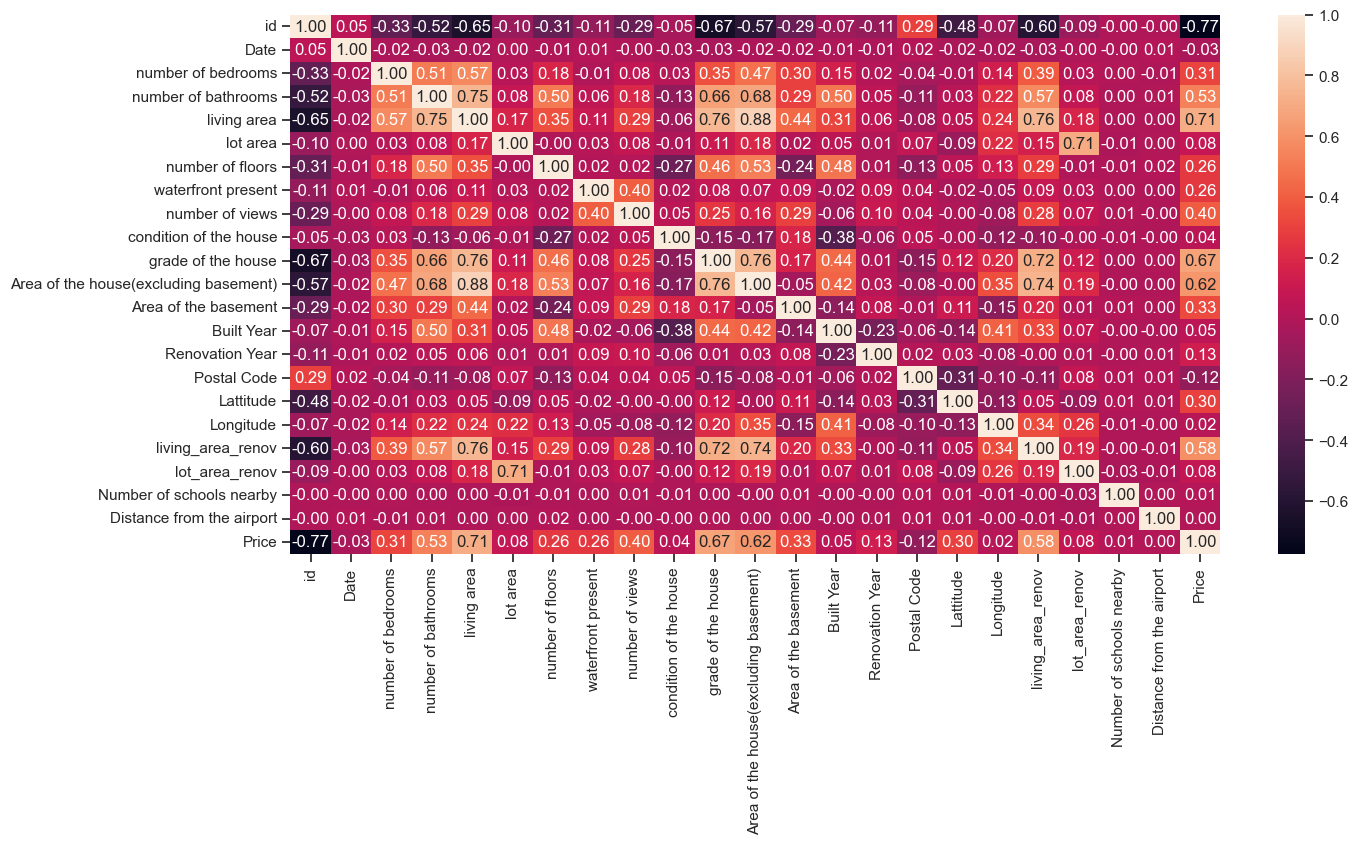

In [14]:
fig, ax = plt.subplots(figsize=(15,7))
sns.heatmap(df.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

<AxesSubplot:xlabel='Area of the house(excluding basement)', ylabel='living area'>

<AxesSubplot:xlabel='Area of the house(excluding basement)', ylabel='living area'>

<AxesSubplot:xlabel='Area of the house(excluding basement)', ylabel='living area'>

<AxesSubplot:xlabel='Area of the house(excluding basement)', ylabel='living area'>

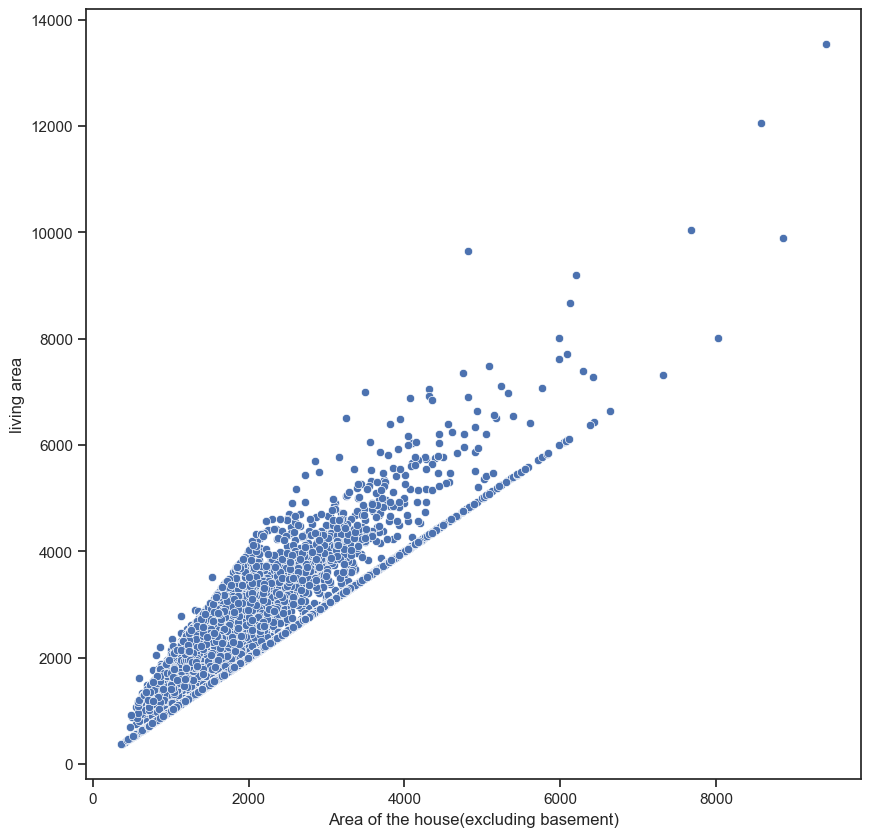

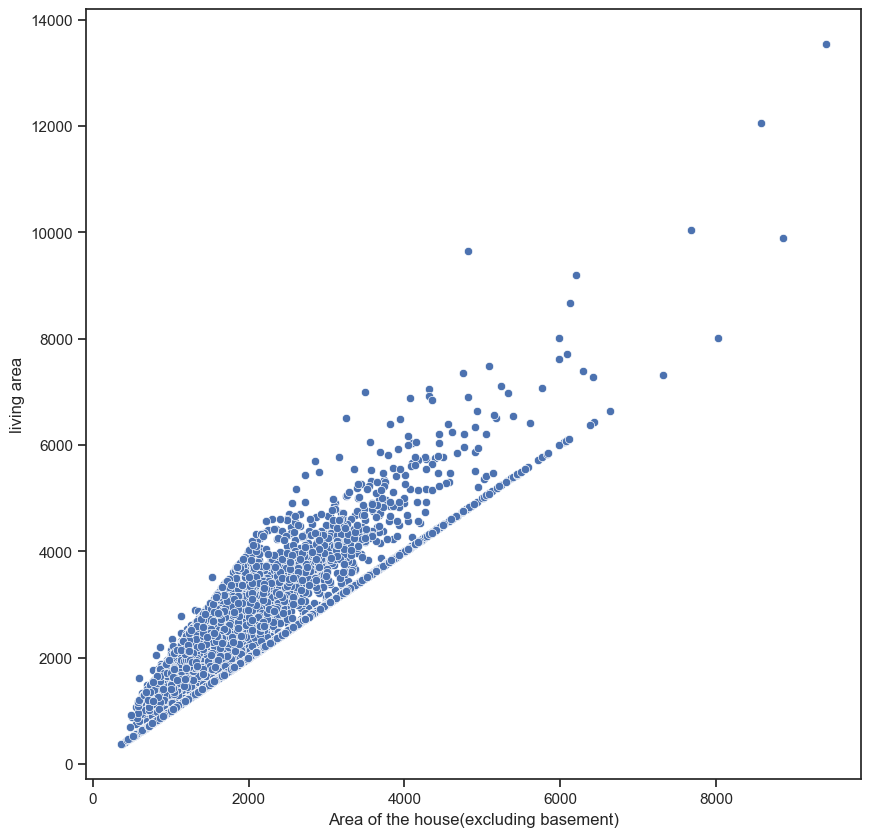

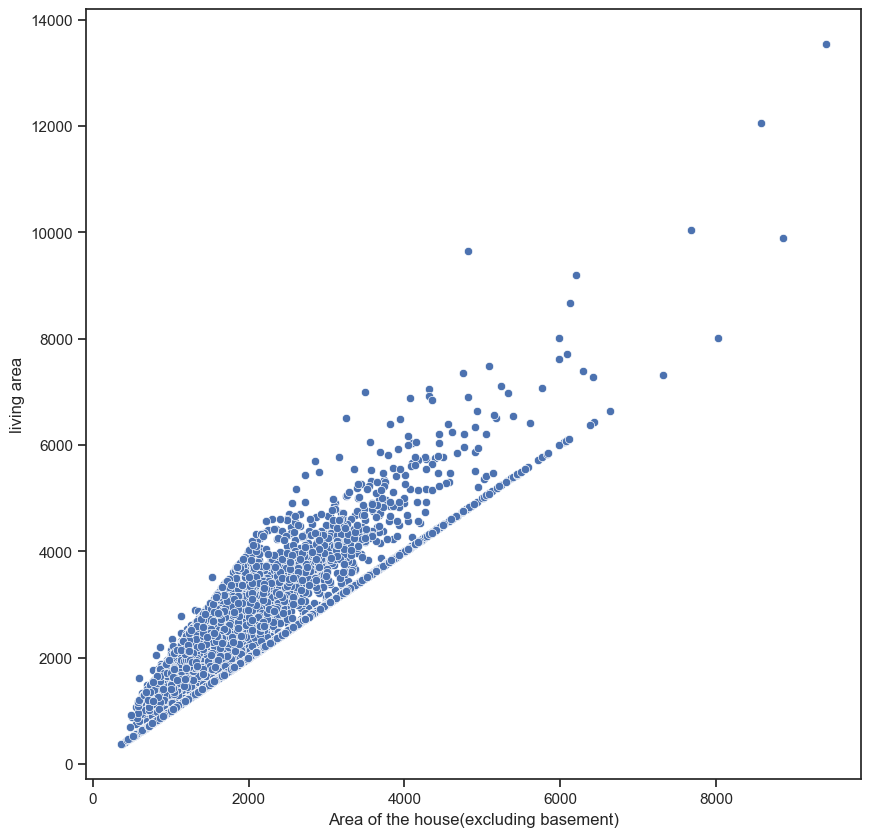

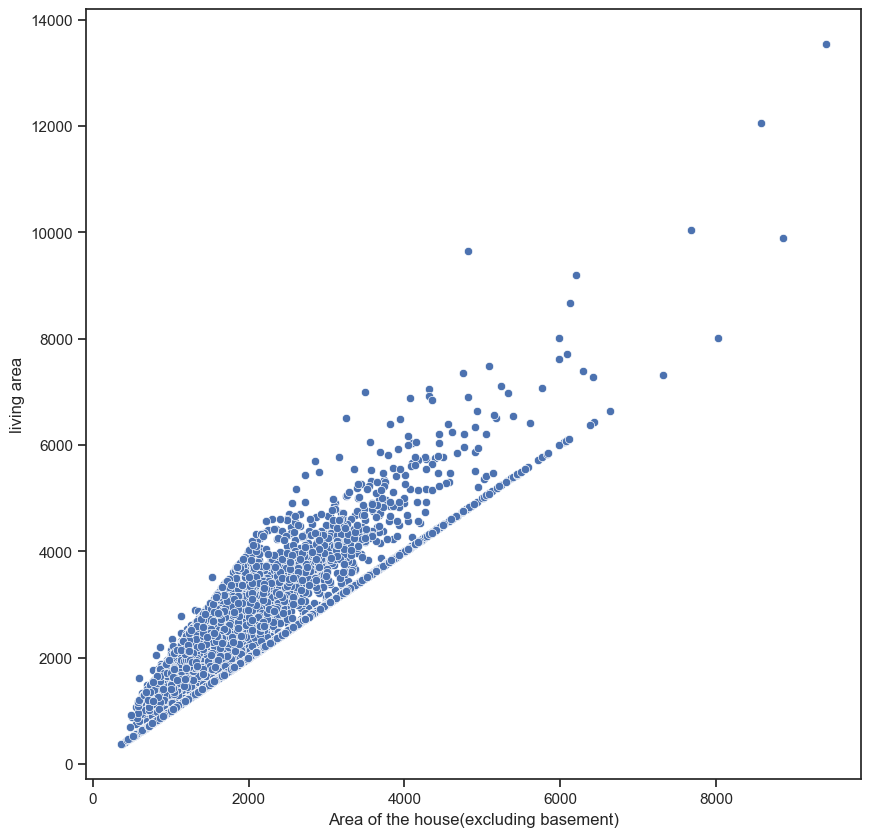

In [15]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.scatterplot(ax=ax, x='Area of the house(excluding basement)', y='living area', data=df)

Между признаками "Area of the house(excluding basement)" и "living area" прослеживается линейная зависимость (коэффициент корреляции = 0.88).

#### Аналитическое вычисление коэффициентов регрессии

In [16]:
from typing import Dict, Tuple

In [17]:
def analytic_regr_coef(x_array : np.ndarray, 
                       y_array : np.ndarray) -> Tuple[float, float]:
    x_mean = np.mean(x_array)
    y_mean = np.mean(y_array)
    var1 = np.sum([(x-x_mean)**2 for x in x_array])
    cov1 = np.sum([(x-x_mean)*(y-y_mean) for x, y in zip(x_array, y_array)])
    b1 = cov1 / var1
    b0 = y_mean - b1*x_mean
    return b0, b1

In [18]:
x_array = df['Area of the house(excluding basement)'].values
y_array = df['living area'].values

In [19]:
b0, b1 = analytic_regr_coef(x_array, y_array)
b0, b1

(341.4973032277378, 0.9750146325497394)

(341.4973032277378, 0.9750146325497394)

(341.4973032277378, 0.9750146325497394)

(341.4973032277378, 0.9750146325497394)

In [20]:
def y_regr(x_array : np.ndarray, b0: float, b1: float) -> np.ndarray:
    res = [b1*x+b0 for x in x_array]
    return res

In [21]:
regr_a = y_regr(x_array, b0, b1)

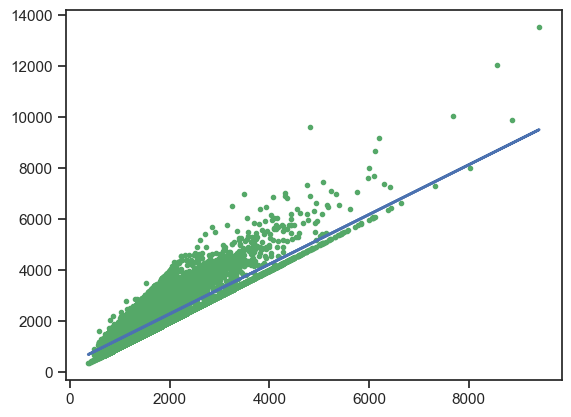

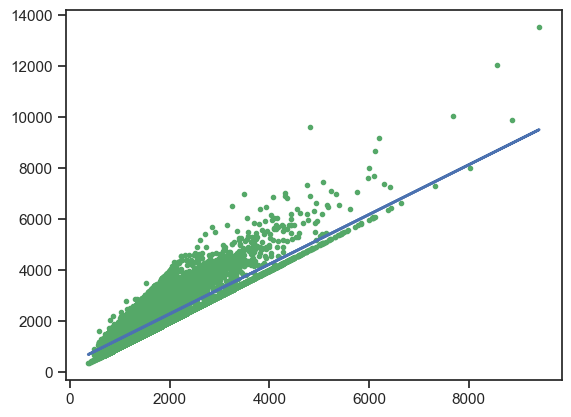

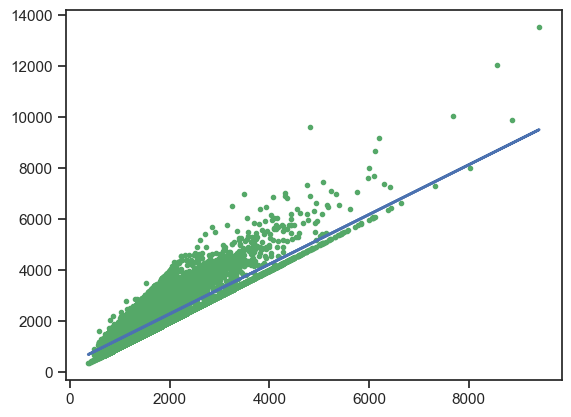

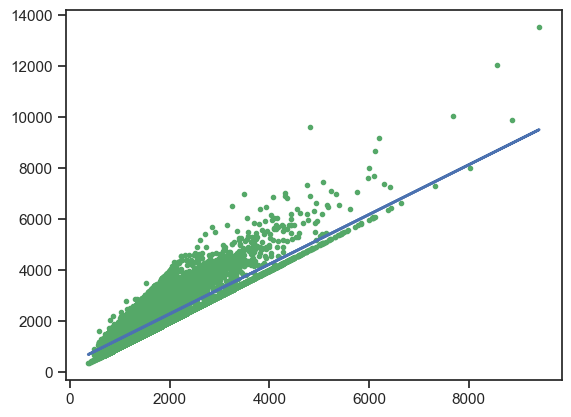

In [22]:
plt.plot(x_array, y_array, 'g.')
plt.plot(x_array, regr_a, 'b', linewidth=2.0)
plt.show()

#### Метод наименьших квадратов

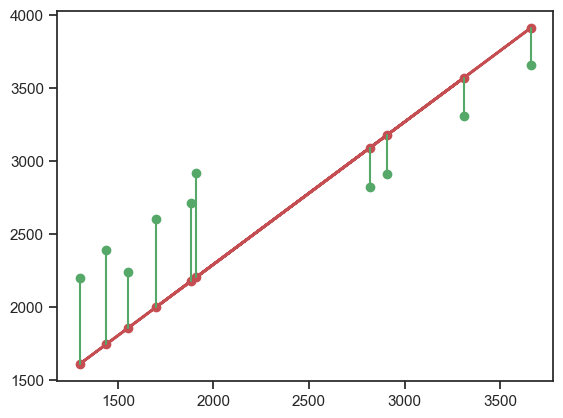

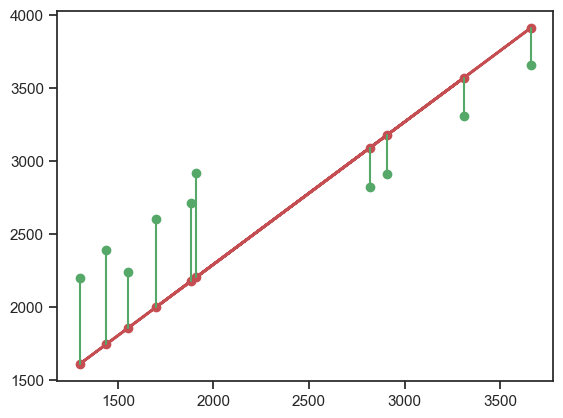

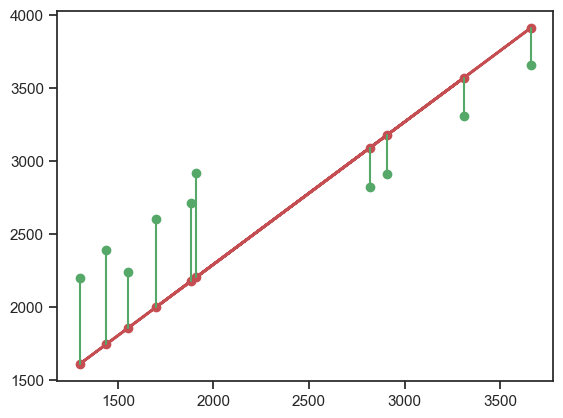

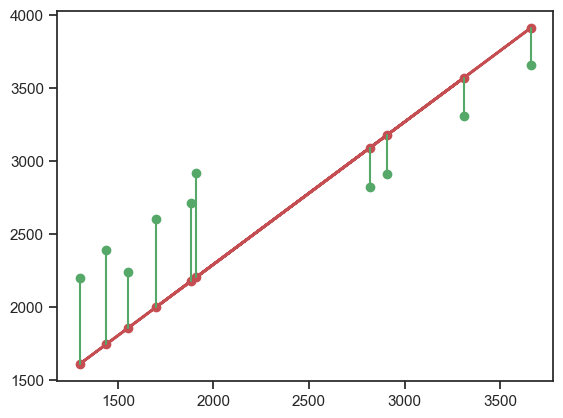

In [23]:
K_mnk=10

plt.plot(x_array[1:K_mnk+1], y_array[1:K_mnk+1], 'go')
plt.plot(x_array[1:K_mnk+1], regr_a[1:K_mnk+1], '-ro', linewidth=2.0)

for i in range(len(x_array[1:K_mnk+1])):
    x1 = x_array[1:K_mnk+1][i]
    y1 = y_array[1:K_mnk+1][i]
    y2 = regr_a[1:K_mnk+1][i]
    plt.plot([x1,x1],[y1,y2],'g-')

plt.show()

#### Градиентный спуск


In [24]:
from sklearn.metrics import mean_squared_error

In [25]:
def gradient_descent(x_array : np.ndarray,
                     y_array : np.ndarray,
                     b0_0 : float,
                     b1_0 : float,
                     epochs : int,
                     learning_rate : float = 0.001
                    ) -> Tuple[float, float]:
    b0, b1 = b0_0, b1_0
    k = float(len(x_array))
    for i in range(epochs): 
        y_pred = b1 * x_array + b0
        dL_db1 = (-2/k) * np.sum(np.multiply(x_array, (y_array - y_pred)))
        dL_db0 = (-2/k) * np.sum(y_array - y_pred)
        b1 = b1 - learning_rate * dL_db1
        b0 = b0 - learning_rate * dL_db0
    y_pred = b1 * x_array + b0
    return b0, b1, y_pred

In [26]:
def show_gradient_descent(epochs, b0_0, b1_0):
    grad_b0, grad_b1, grad_y_pred = gradient_descent(x_array, y_array, b0_0, b1_0, epochs)
    print('b0 = {} - (теоретический), {} - (градиентный спуск)'.format(b0, grad_b0))
    print('b1 = {} - (теоретический), {} - (градиентный спуск)'.format(b1, grad_b1))
    print('MSE = {}'.format(mean_squared_error(regr_a, grad_y_pred)))
    plt.plot(x_array, y_array, 'g.')
    plt.plot(x_array, regr_a, 'b', linewidth=2.0)
    plt.plot(x_array, grad_y_pred, 'r', linewidth=2.0)
    plt.show()

b0 = 341.4973032277378 - (теоретический), 4.196525991792066 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 8916.876848563612 - (градиентный спуск)
MSE = 313321312806481.75
b0 = 341.4973032277378 - (теоретический), 4.196525991792066 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 8916.876848563612 - (градиентный спуск)
MSE = 313321312806481.75
b0 = 341.4973032277378 - (теоретический), 4.196525991792066 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 8916.876848563612 - (градиентный спуск)
MSE = 313321312806481.75
b0 = 341.4973032277378 - (теоретический), 4.196525991792066 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 8916.876848563612 - (градиентный спуск)
MSE = 313321312806481.75


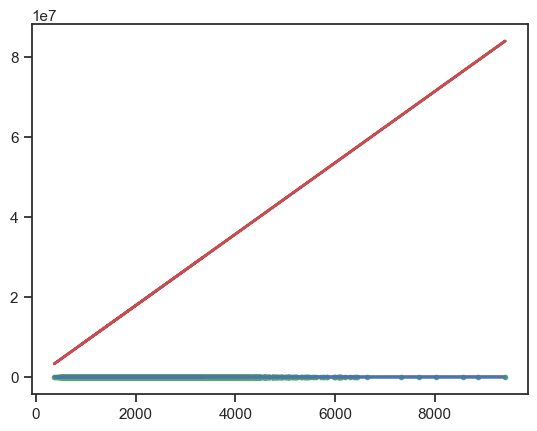

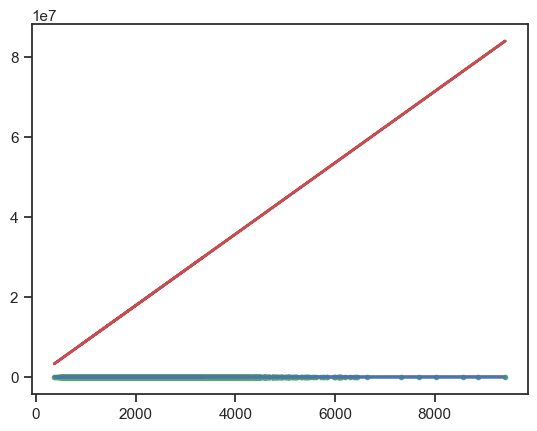

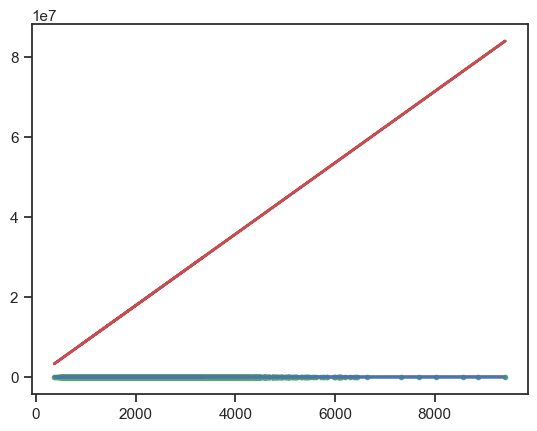

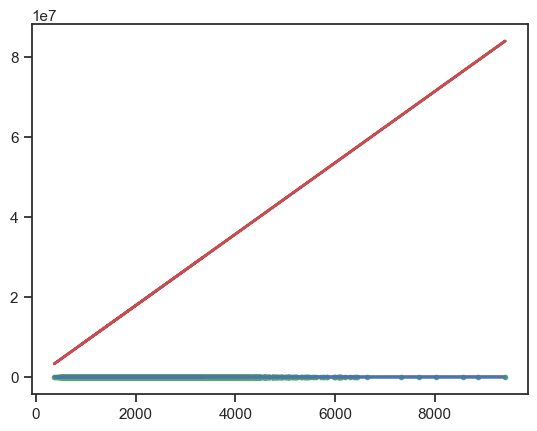

In [27]:
show_gradient_descent(1, 0, 0)

b0 = 341.4973032277378 - (теоретический), 341.49730228589135 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 0.9800121687534198 - (градиентный спуск)
MSE = 98.44331398080551
b0 = 341.4973032277378 - (теоретический), 341.49730228589135 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 0.9800121687534198 - (градиентный спуск)
MSE = 98.44331398080551
b0 = 341.4973032277378 - (теоретический), 341.49730228589135 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 0.9800121687534198 - (градиентный спуск)
MSE = 98.44331398080551
b0 = 341.4973032277378 - (теоретический), 341.49730228589135 - (градиентный спуск)
b1 = 0.9750146325497394 - (теоретический), 0.9800121687534198 - (градиентный спуск)
MSE = 98.44331398080551


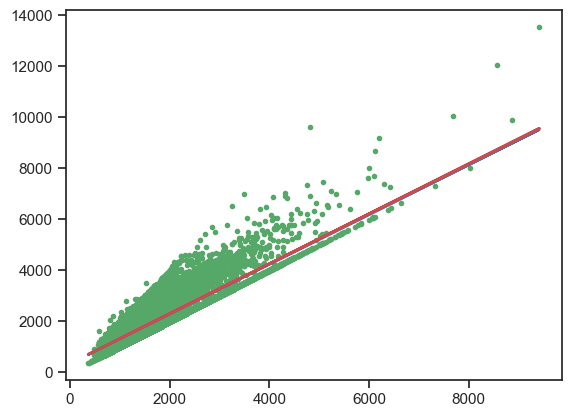

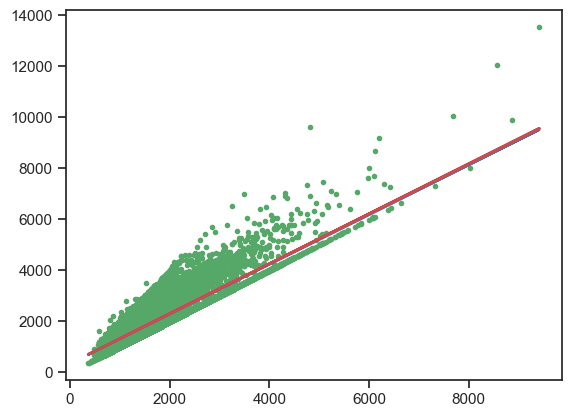

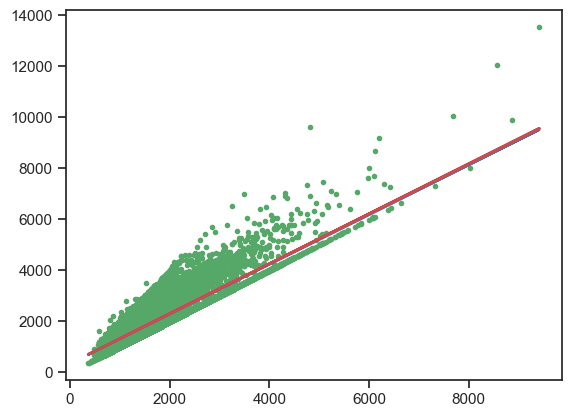

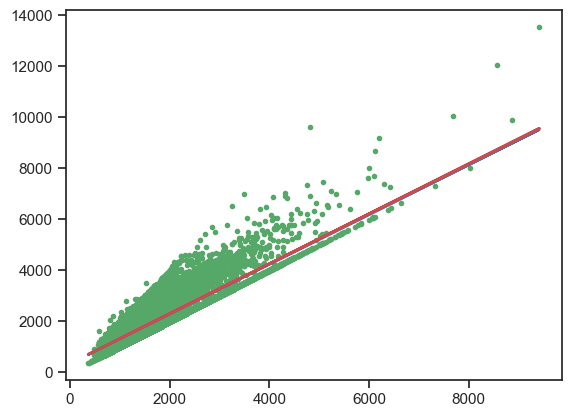

In [28]:
show_gradient_descent(1, 341.4973, 0.975014)

Подбор коэффициентов через LinearRegression

In [29]:
from sklearn.linear_model import LinearRegression

In [30]:
regr1 = LinearRegression().fit(x_array.reshape(-1, 1), y_array.reshape(-1, 1))
(b1, regr1.coef_), (b0, regr1.intercept_)

((0.9750146325497394, array([[0.97501463]])),
 (341.4973032277378, array([341.49730323])))

((0.9750146325497394, array([[0.97501463]])),
 (341.4973032277378, array([341.49730323])))

((0.9750146325497394, array([[0.97501463]])),
 (341.4973032277378, array([341.49730323])))

((0.9750146325497394, array([[0.97501463]])),
 (341.4973032277378, array([341.49730323])))

In [31]:
model1 = LinearRegression()
model1.fit(X_train, y_train)

LinearRegression()

LinearRegression()

LinearRegression()

LinearRegression()

## SVM модель

In [32]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [33]:

#функция, печатающая метрики
def print_metrics(y_test, y_pred):
    print(f"R^2_score: {r2_score(y_test, y_pred)}")
    print(f"MSE: {mean_squared_error(y_test, y_pred)}")
    print(f"MAE: {mean_absolute_error(y_test, y_pred)}")

In [34]:
clf1 = SVC().fit(X_train, y_train)
print_metrics(y_test, clf1.predict(X_test))

R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615


In [35]:

clf1 = SVC().fit(X_train, y_train)
print_metrics(y_test, clf1.predict(X_test))
     

R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615
R^2_score: -0.2178228810816878
MSE: 1032337.1830369357
MAE: 720.4722298221615


In [36]:

boston_x = df['Area of the house(excluding basement)'].values
boston_y = df['living area'].values

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

<AxesSubplot:>

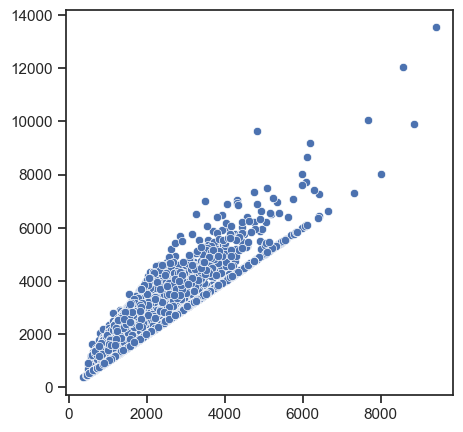

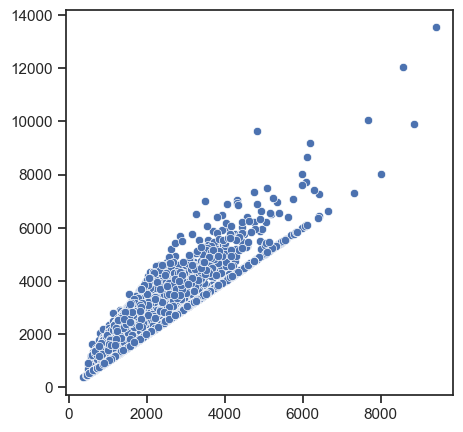

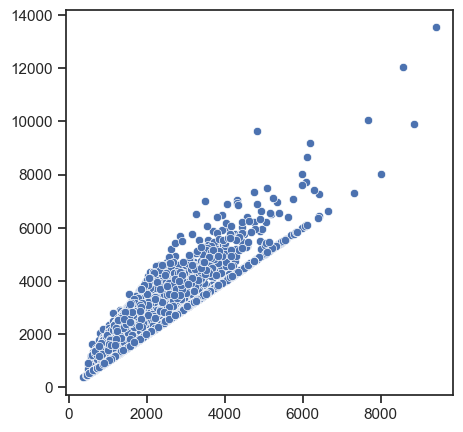

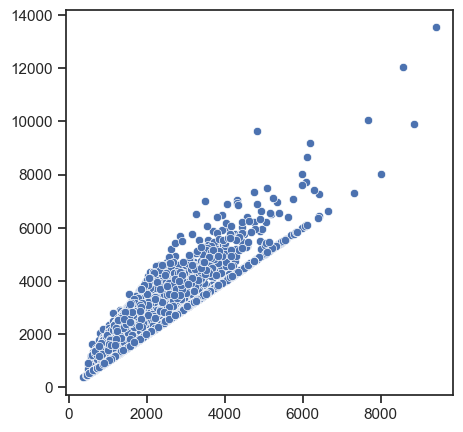

In [37]:
fig, ax = plt.subplots(figsize=(5,5)) 
sns.scatterplot(ax=ax, x=boston_x, y=boston_y)

In [38]:
def plot_regr(clf):
    title = clf.__repr__
    clf.fit(boston_x.reshape(-1, 1), boston_y)
    boston_y_pred = clf.predict(boston_x.reshape(-1, 1))
    fig, ax = plt.subplots(figsize=(5,5))
    ax.set_title(title)
    ax.plot(boston_x, boston_y, 'b.')
    ax.plot(boston_x, boston_y_pred, 'ro')
    plt.show()

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


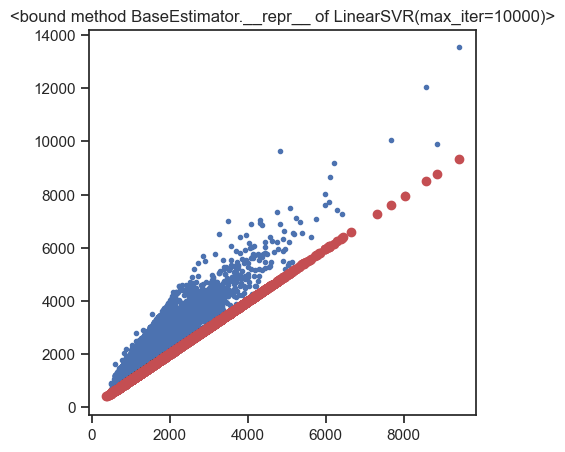

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


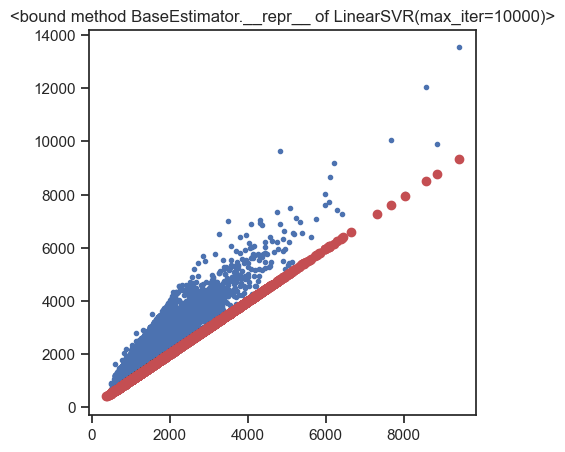

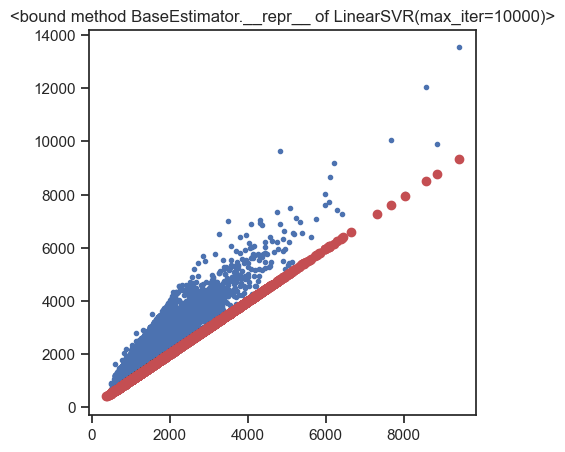

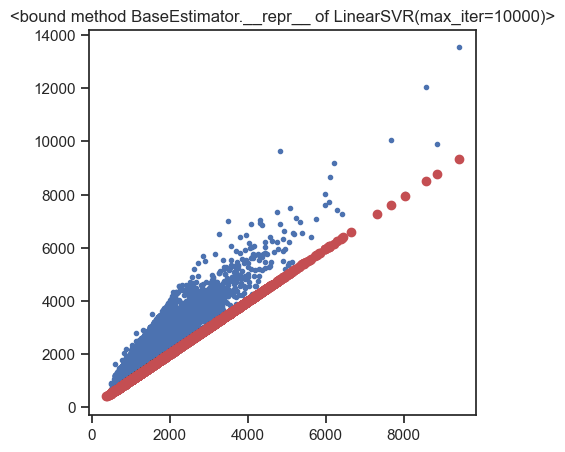

In [39]:
plot_regr(LinearSVR(C=1.0, max_iter=10000))

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


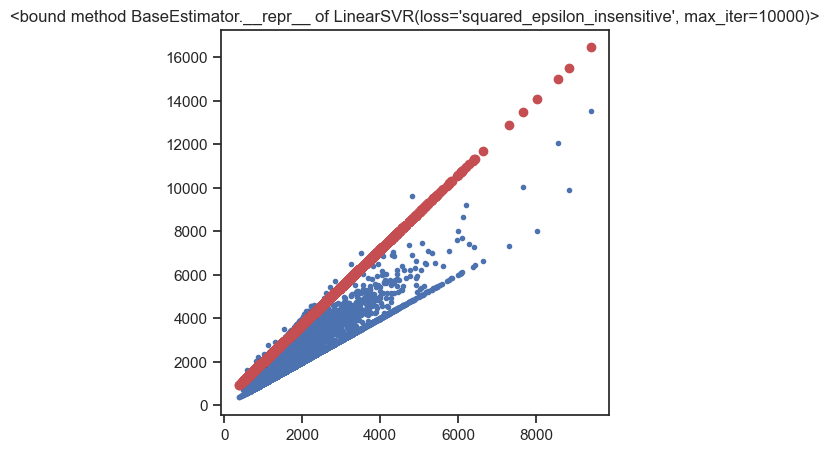

/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/evgeniayurova/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


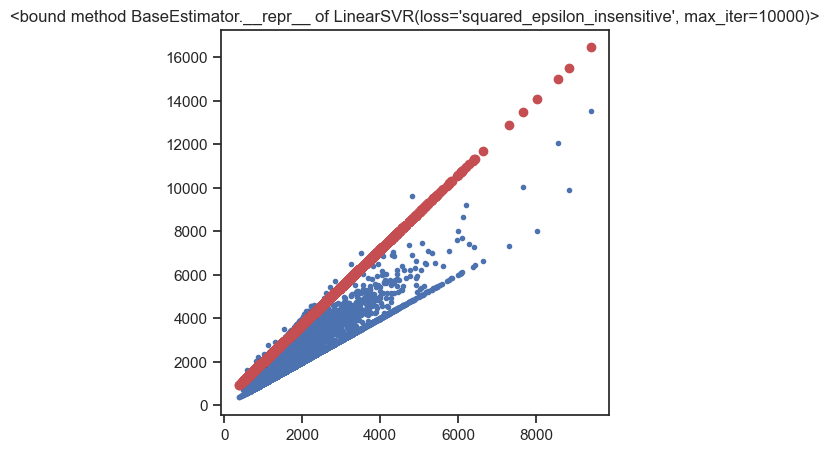

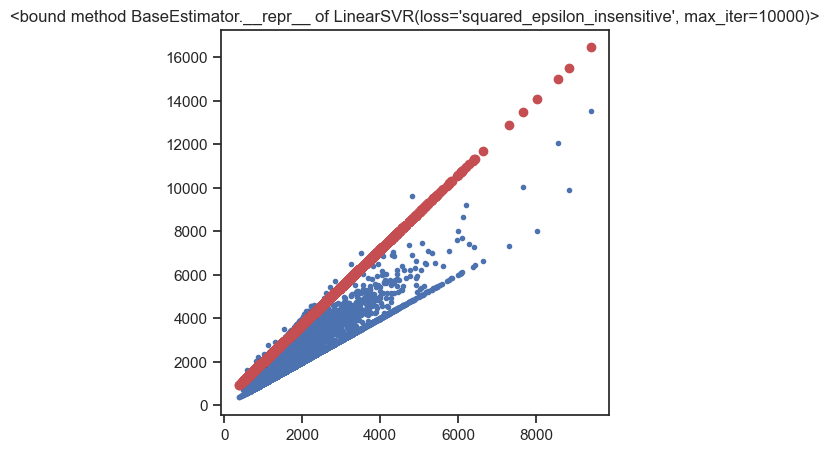

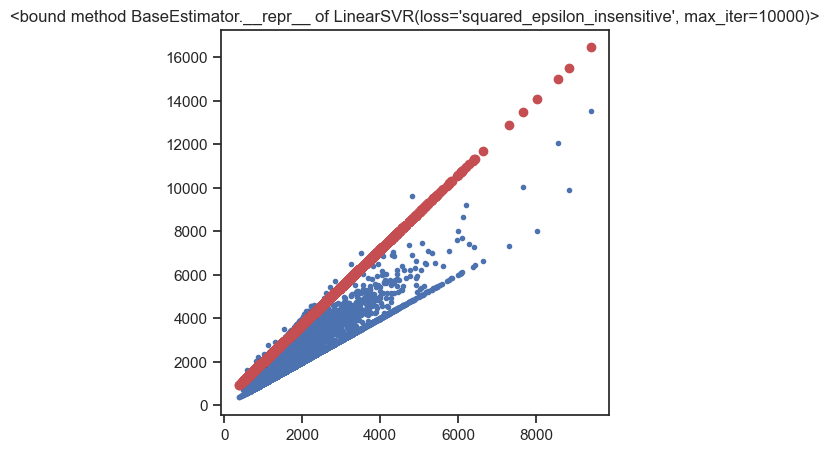

In [40]:
plot_regr(LinearSVR(C=1.0, loss='squared_epsilon_insensitive', max_iter=10000))

## Дерево решений

In [41]:
from sklearn.tree import DecisionTreeRegressor

In [42]:
def stat_tree(estimator):
    n_nodes = estimator.tree_.node_count
    children_left = estimator.tree_.children_left
    children_right = estimator.tree_.children_right

    node_depth = np.zeros(shape=n_nodes, dtype=np.int64)
    is_leaves = np.zeros(shape=n_nodes, dtype=bool)
    stack = [(0, -1)]  # seed is the root node id and its parent depth
    while len(stack) > 0:
        node_id, parent_depth = stack.pop()
        node_depth[node_id] = parent_depth + 1

        # If we have a test node
        if (children_left[node_id] != children_right[node_id]):
            stack.append((children_left[node_id], parent_depth + 1))
            stack.append((children_right[node_id], parent_depth + 1))
        else:
            is_leaves[node_id] = True

    print("Всего узлов:", n_nodes)
    print("Листовых узлов:", sum(is_leaves))
    print("Глубина дерева:", max(node_depth))
    print("Минимальная глубина листьев дерева:", min(node_depth[is_leaves]))
    print("Средняя глубина листьев дерева:", node_depth[is_leaves].mean())

Построим модель дерева с глубиной = 3:

In [43]:
regr5 = DecisionTreeRegressor(max_depth=3)
model5 = regr5.fit(X_train, y_train)

Выведем основную статистику для дерева:

In [44]:
stat_tree(model5)

Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0
Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0
Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0
Всего узлов: 15
Листовых узлов: 8
Глубина дерева: 3
Минимальная глубина листьев дерева: 3
Средняя глубина листьев дерева: 3.0


с глубиной 5

In [45]:
regr6 = DecisionTreeRegressor(max_depth=5)
model6 = regr6.fit(X_train, y_train)

In [46]:
stat_tree(model6)

Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0
Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0
Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0
Всего узлов: 63
Листовых узлов: 32
Глубина дерева: 5
Минимальная глубина листьев дерева: 5
Средняя глубина листьев дерева: 5.0


##  Оценка качества моделей с помощью двух метрик. Сравнение качества.

Оценивать качество регрессии будем при помощи двух метрик - средней абсолютной ошибки (Mean Absolute Error) и медианной абсолютной ошибки (Median Absolute Error):

In [47]:
from sklearn.metrics import mean_absolute_error, median_absolute_error 

In [48]:
err1 = []
err2 = []

In [49]:
def rate_model(model):
    print("Средняя абсолютная ошибка:",
          mean_absolute_error(y_test, model.predict(X_test)))
    err1.append(mean_absolute_error(y_test, model.predict(X_test)))
    print("Медианная абсолютная ошибка:",
          median_absolute_error(y_test, model.predict(X_test)))
    err2.append(median_absolute_error(y_test, model.predict(X_test)))

In [50]:
rate_model(model1)

Средняя абсолютная ошибка: 6.002478404881537e-12
Медианная абсолютная ошибка: 5.6843418860808015e-12
Средняя абсолютная ошибка: 6.002478404881537e-12
Медианная абсолютная ошибка: 5.6843418860808015e-12
Средняя абсолютная ошибка: 6.002478404881537e-12
Медианная абсолютная ошибка: 5.6843418860808015e-12
Средняя абсолютная ошибка: 6.002478404881537e-12
Медианная абсолютная ошибка: 5.6843418860808015e-12


In [51]:
rate_model(clf1)

Средняя абсолютная ошибка: 720.4722298221615
Средняя абсолютная ошибка: 720.4722298221615
Средняя абсолютная ошибка: 720.4722298221615
Средняя абсолютная ошибка: 720.4722298221615
Медианная абсолютная ошибка: 520.0
Медианная абсолютная ошибка: 520.0
Медианная абсолютная ошибка: 520.0
Медианная абсолютная ошибка: 520.0


In [52]:
rate_model(model5)

Средняя абсолютная ошибка: 270.5377986073561
Медианная абсолютная ошибка: 229.83852691218135
Средняя абсолютная ошибка: 270.5377986073561
Медианная абсолютная ошибка: 229.83852691218135
Средняя абсолютная ошибка: 270.5377986073561
Медианная абсолютная ошибка: 229.83852691218135
Средняя абсолютная ошибка: 270.5377986073561
Медианная абсолютная ошибка: 229.83852691218135


In [53]:
rate_model(model6)

Средняя абсолютная ошибка: 123.7956919508639
Медианная абсолютная ошибка: 101.3177641653906
Средняя абсолютная ошибка: 123.7956919508639
Медианная абсолютная ошибка: 101.3177641653906
Средняя абсолютная ошибка: 123.7956919508639
Медианная абсолютная ошибка: 101.3177641653906
Средняя абсолютная ошибка: 123.7956919508639
Медианная абсолютная ошибка: 101.3177641653906


Чем ближе значение средней абсолютной ошибки и медианной абсолютной ошибки к нулю, тем лучше качество регрессии.

Самая лучшая по качеству по обоим метрикам - первая модель, полученная при помощи LinearRegression, а худшая - SVM.



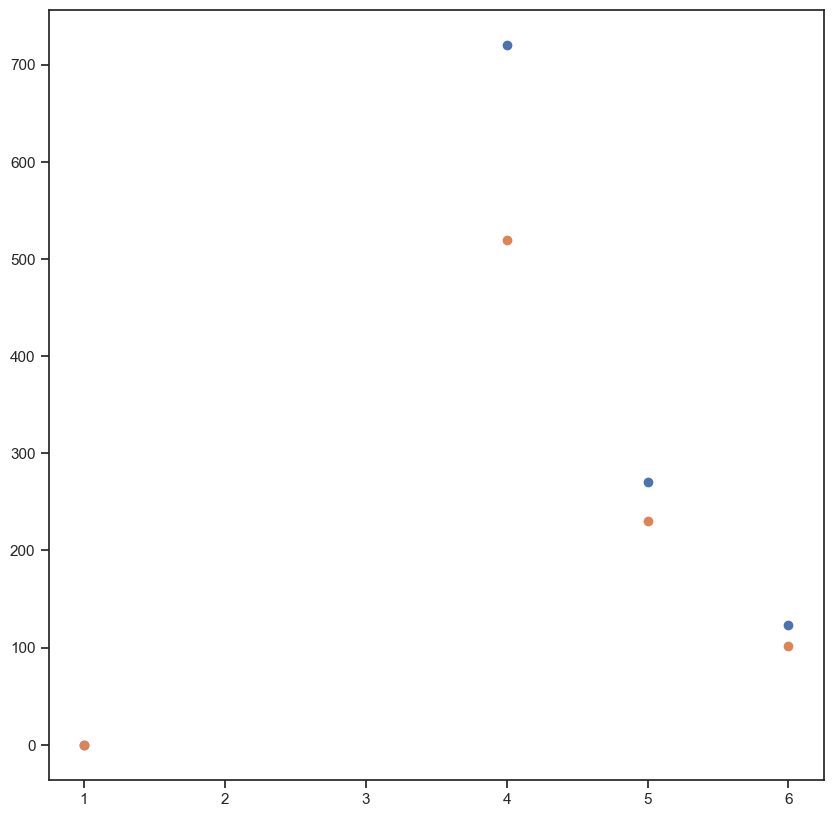

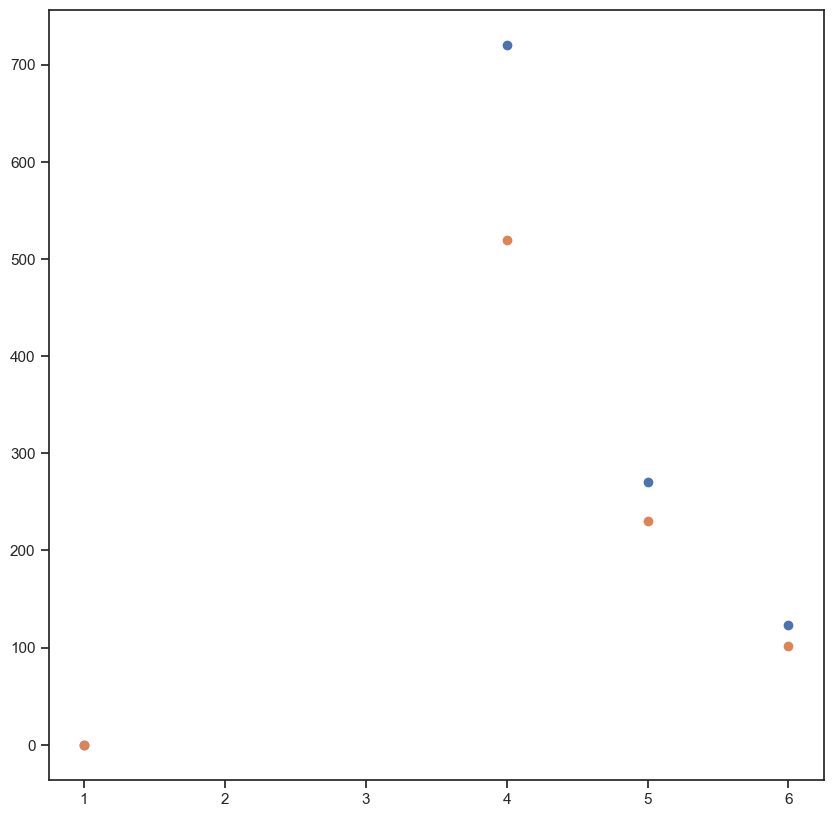

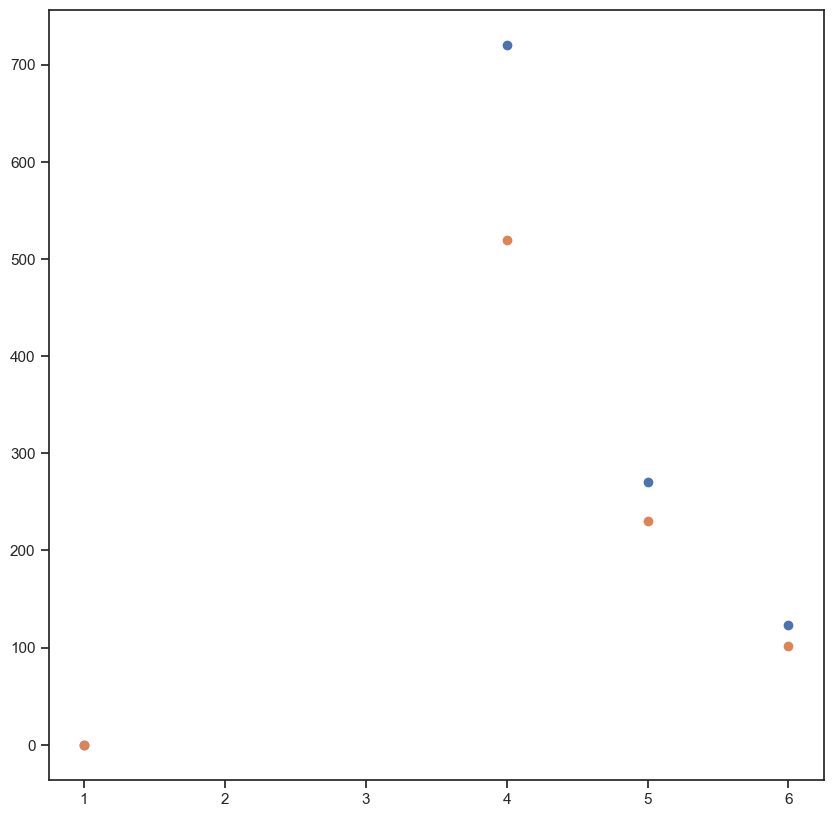

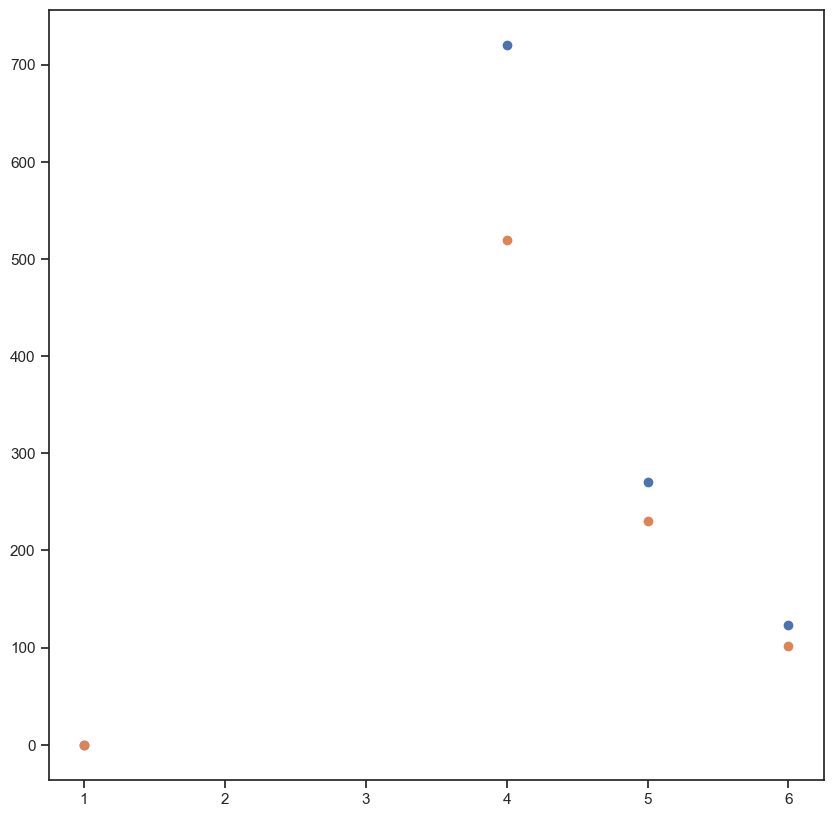

In [54]:
fig, ax = plt.subplots(figsize=(10,10)) 
plt.scatter([1,4, 5, 6], err1)
plt.scatter([1,4, 5, 6], err2)

### График важности признаков в дереве решений

Вычисление важности признаков основано на том, какое количество раз признак встречается в условиях дерева:

In [55]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

Проверим для модели с глубиной = 3:

In [56]:
list(zip(df.columns.values, model5.feature_importances_))

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7766132657905691),
 ('Area of the house(excluding basement)', 0.22338673420943087),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7766132657905691),
 ('Area of the house(excluding basement)', 0.22338673420943087),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7766132657905691),
 ('Area of the house(excluding basement)', 0.22338673420943087),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7766132657905691),
 ('Area of the house(excluding basement)', 0.22338673420943087),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

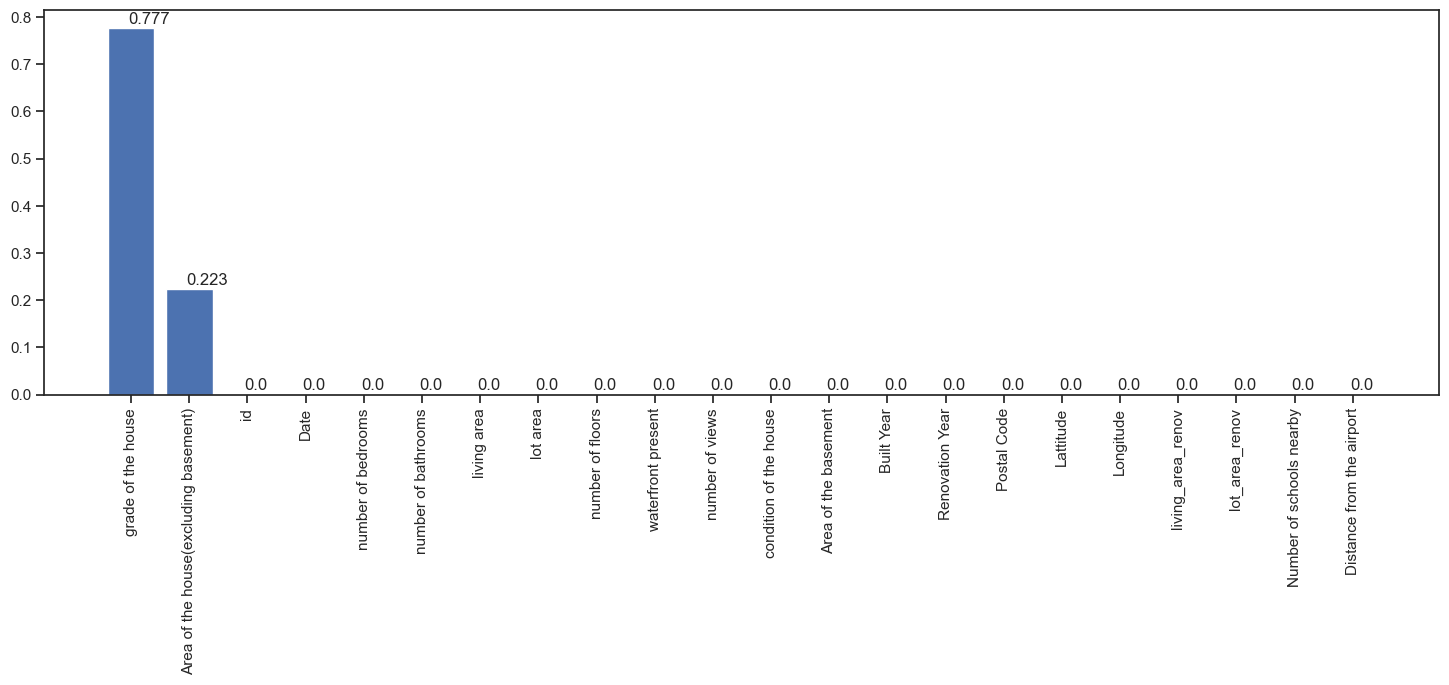

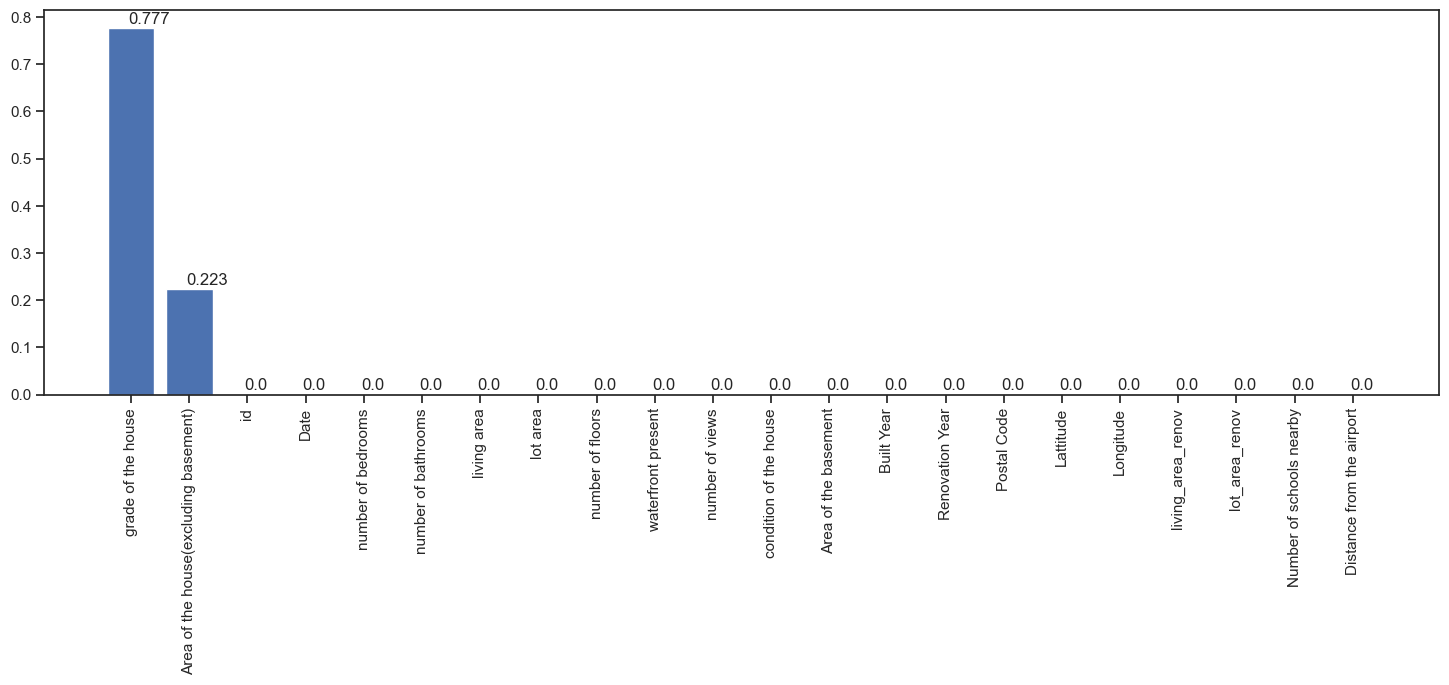

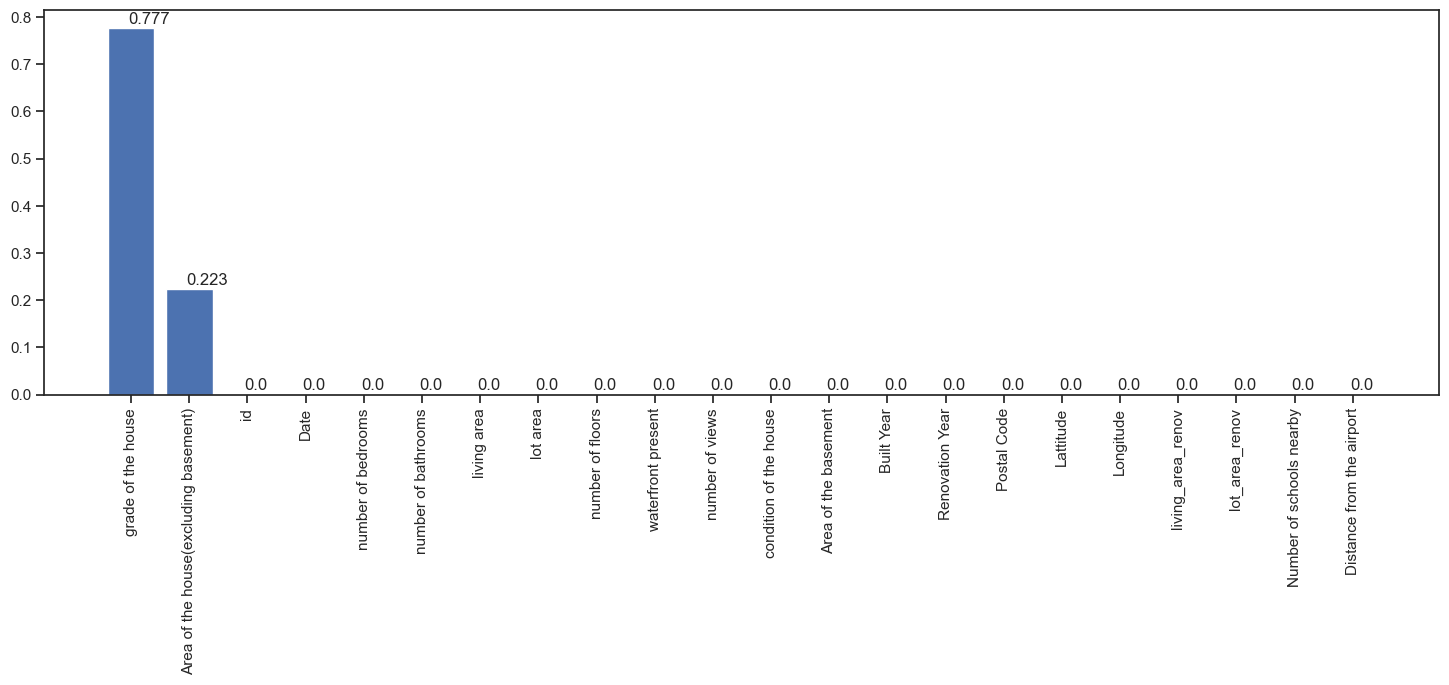

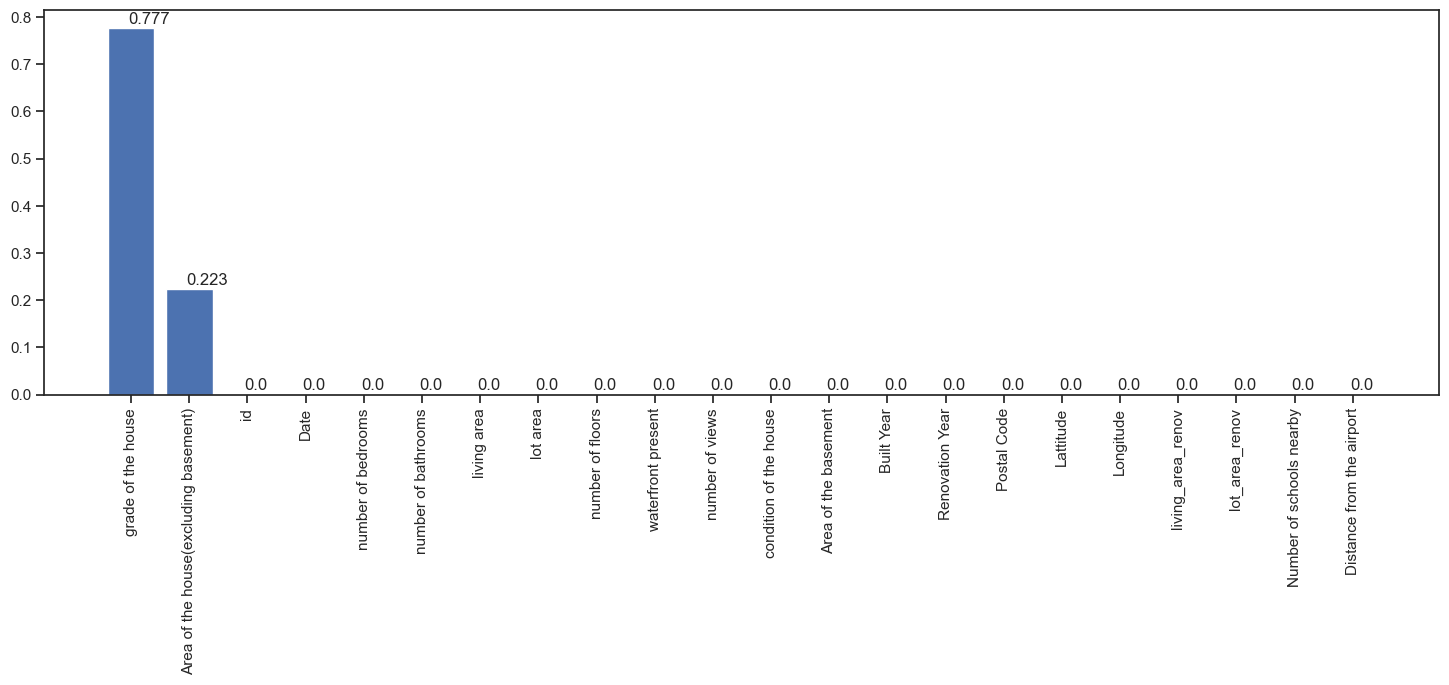

In [57]:
car_tree_cl_fl_1, car_tree_cl_fd_1 = draw_feature_importances(model5, df)

Для модели с глубиной = 5

In [58]:
list(zip(df.columns.values, model6.feature_importances_))

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7646048544082429),
 ('Area of the house(excluding basement)', 0.23539514559175717),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7646048544082429),
 ('Area of the house(excluding basement)', 0.23539514559175717),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7646048544082429),
 ('Area of the house(excluding basement)', 0.23539514559175717),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

[('id', 0.0),
 ('Date', 0.0),
 ('number of bedrooms', 0.0),
 ('number of bathrooms', 0.0),
 ('living area', 0.0),
 ('lot area', 0.0),
 ('number of floors', 0.0),
 ('waterfront present', 0.0),
 ('number of views', 0.0),
 ('condition of the house', 0.0),
 ('grade of the house', 0.7646048544082429),
 ('Area of the house(excluding basement)', 0.23539514559175717),
 ('Area of the basement', 0.0),
 ('Built Year', 0.0),
 ('Renovation Year', 0.0),
 ('Postal Code', 0.0),
 ('Lattitude', 0.0),
 ('Longitude', 0.0),
 ('living_area_renov', 0.0),
 ('lot_area_renov', 0.0),
 ('Number of schools nearby', 0.0),
 ('Distance from the airport', 0.0)]

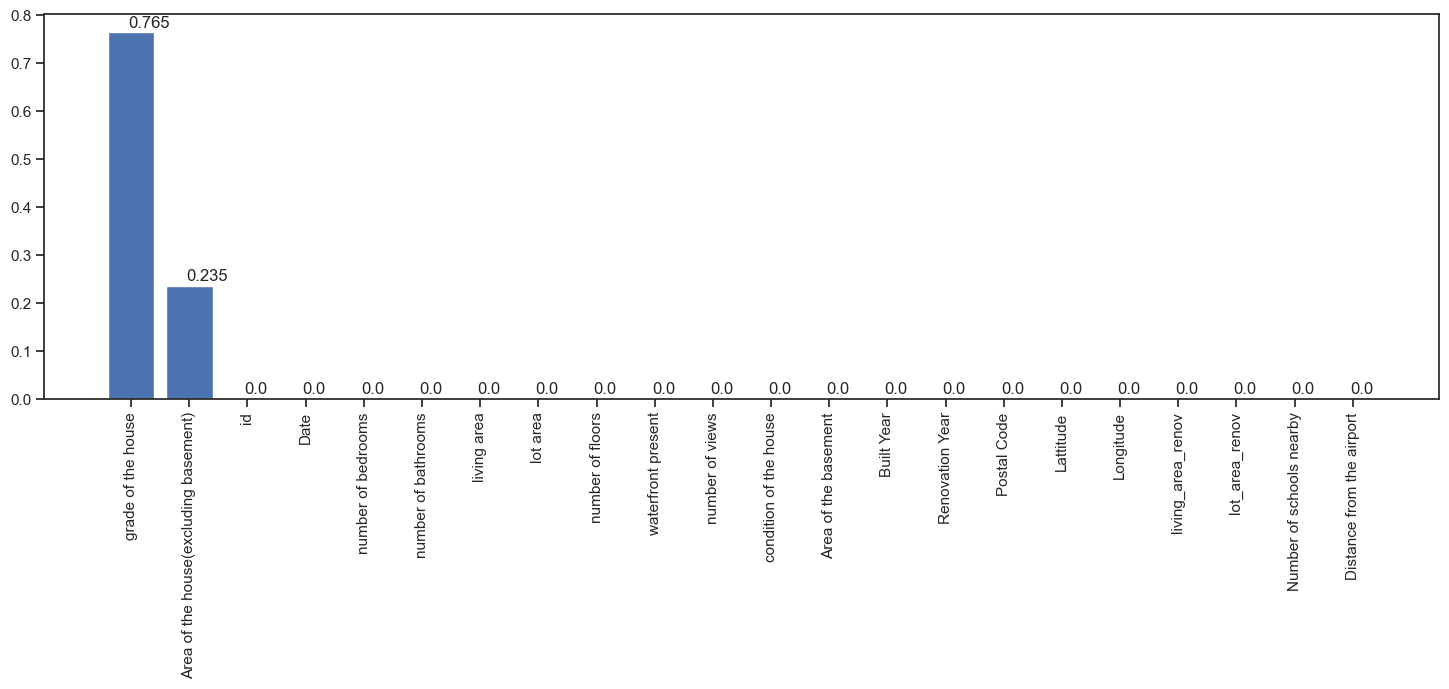

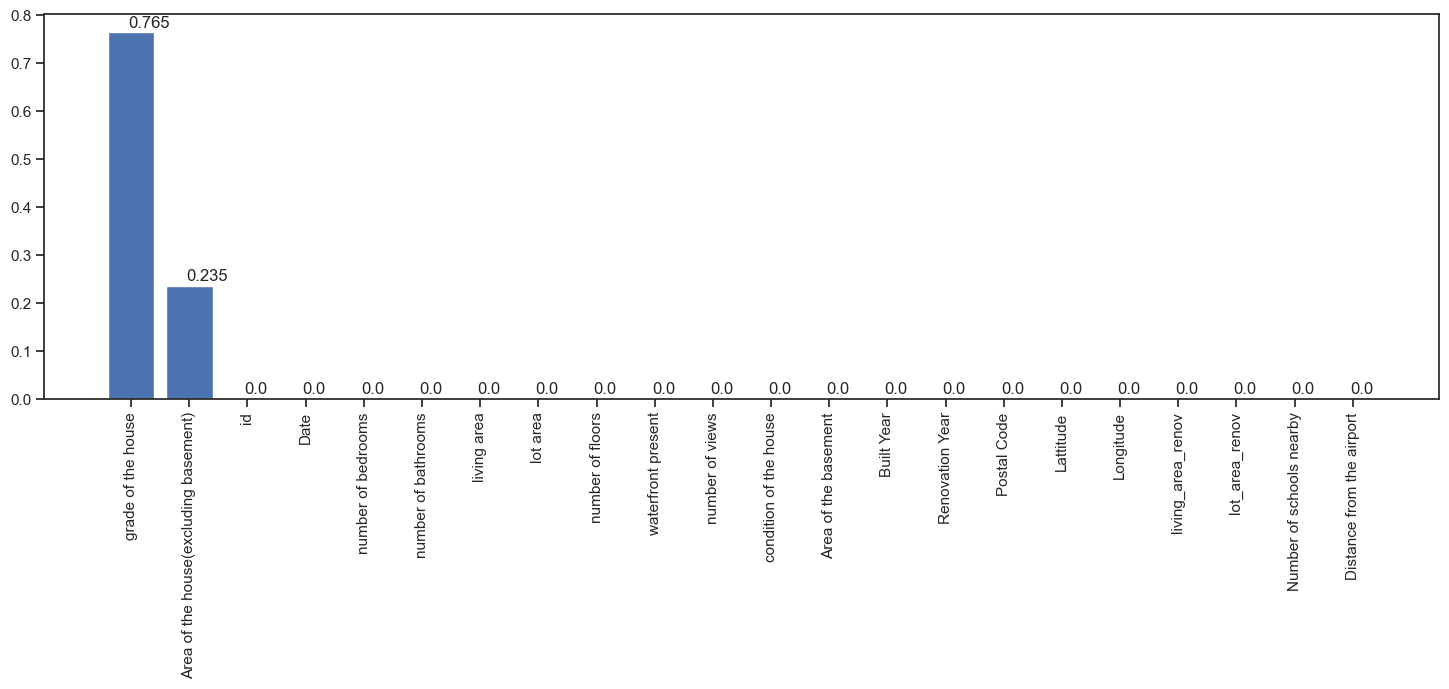

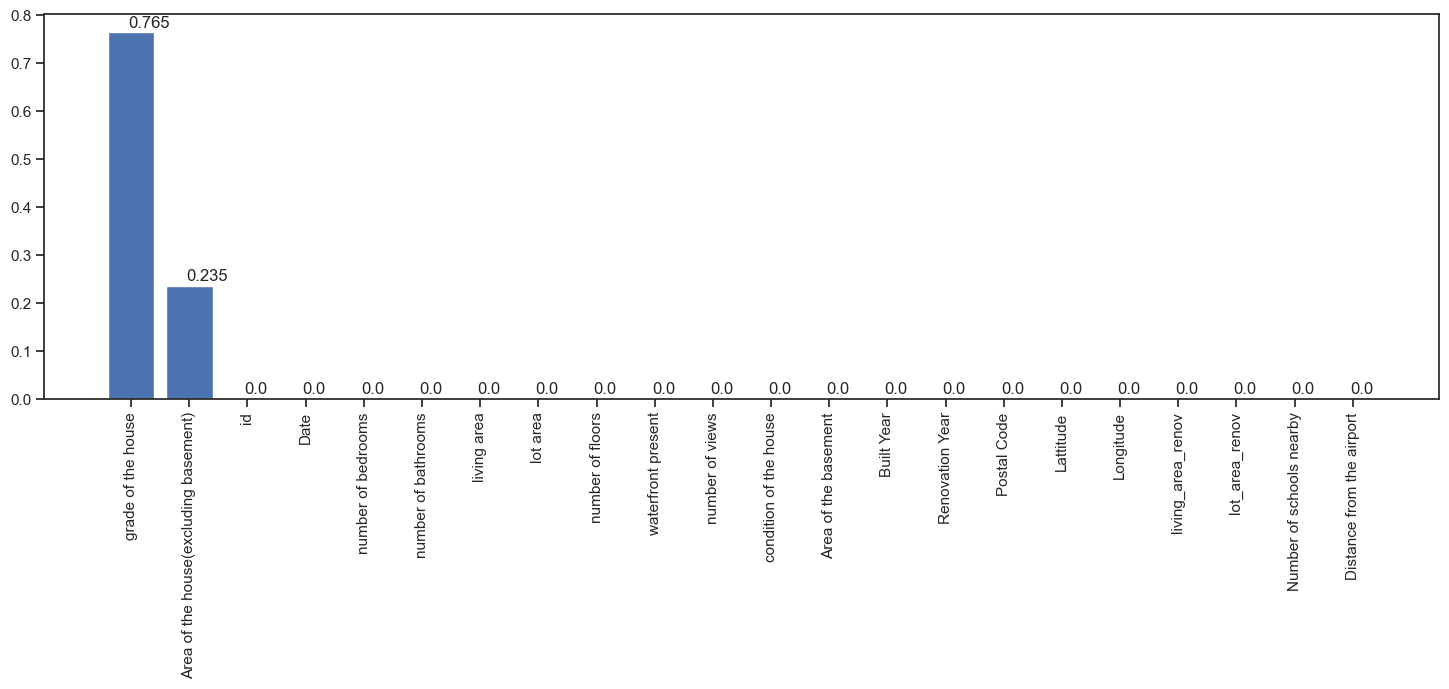

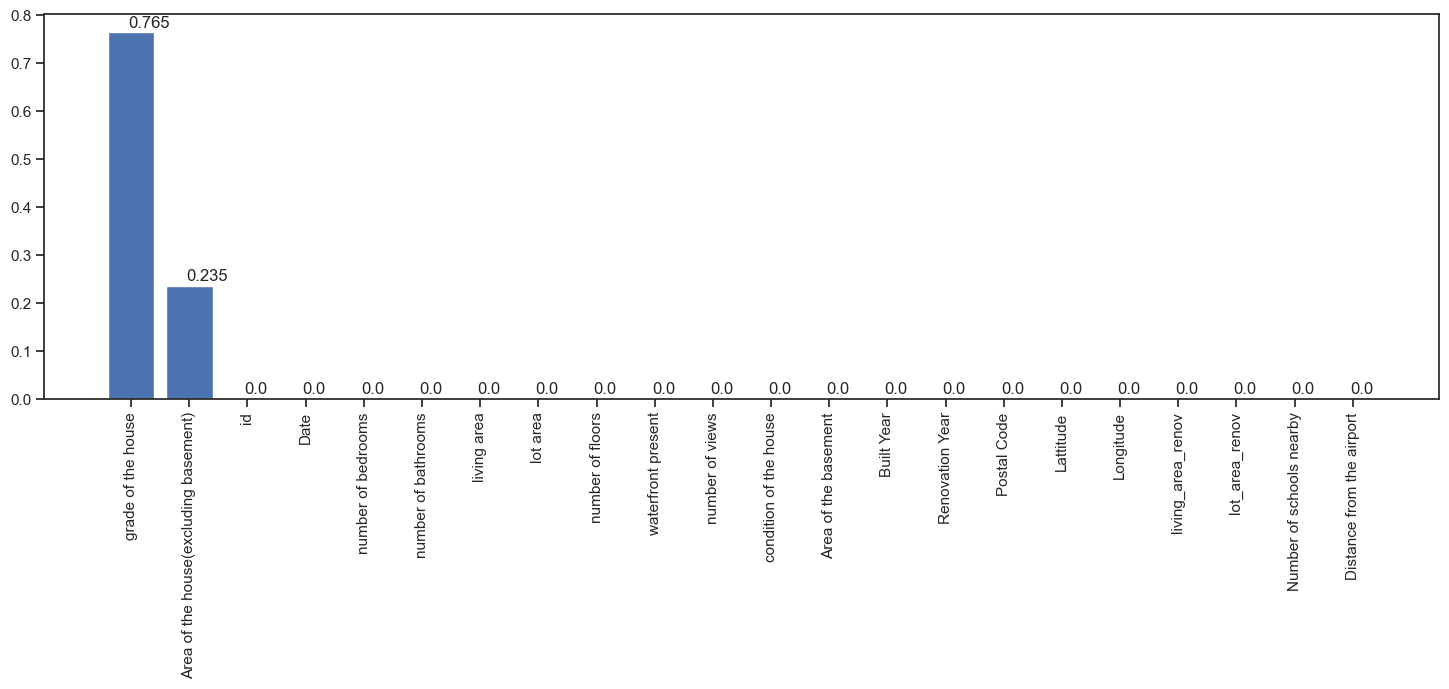

In [59]:
car_tree_cl_fl_2, car_tree_cl_fd_ = draw_feature_importances(model6, df)

# Визуализация деревьев решений и его правила

In [60]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [61]:
pip install pydotplus

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [62]:
from io import StringIO 
from IPython.display import Image
import graphviz
import pydotplus
from sklearn.tree import export_graphviz

In [63]:
conda install -c conda-forge python-graphviz


Solving environment: done
Solving environment: done
Solving environment: done
Solving environment: done
done
done
done


==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.



==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.3.1



# All requested packages already installed.



==> WARNING: A newer version of conda exists. <==
  current version: 22.11.1
  latest version: 23.3.1

Please update conda by running

    $ conda update -n base -c conda-forge conda

Or to minimize the nu

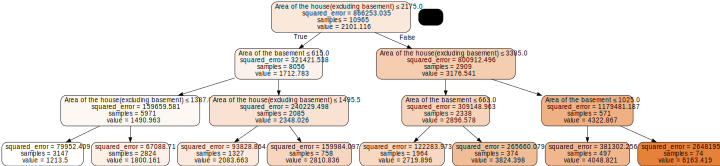

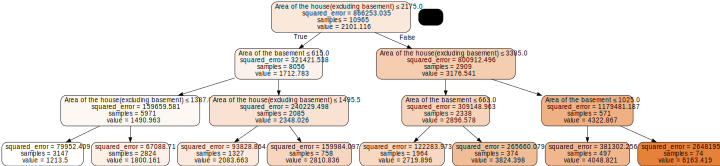

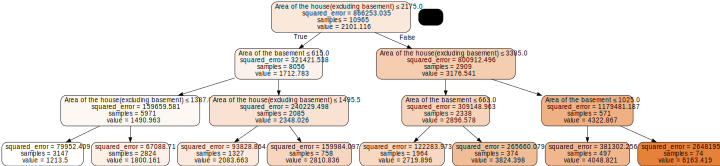

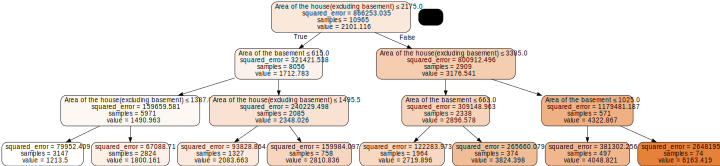

In [64]:
dot_data = export_graphviz(model5, out_file=None, 
                           feature_names=X_train.columns, 
                           class_names=df["grade of the house"], 
                           filled=True, rounded=True, special_characters=True)  
pydot_graph = pydotplus.graph_from_dot_data(dot_data)
pydot_graph.set_size(10)
gvz_graph = graphviz.Source(pydot_graph.to_string())
gvz_graph

## Вывод правил дерева

In [65]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(model5, feature_names=list(X_train.columns))
HTML('<pre>' + tree_rules + '</pre>')